#Analysis of Weather Data
#In the next section we load the data from the csv file and view the 5 rows. We also convert the date column to a date time data type.

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandasql import *

df = pd.read_csv('598354.csv',parse_dates=[2])
df.head()


,STATION,STATION_NAME,DATE,MDPR,DAPR,PRCP,TMAX,TMIN,TOBS
0,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-01,-9999,-9999,-9999,217,83,-9999
1,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-02,-9999,-9999,-9999,217,72,-9999
2,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-03,-9999,-9999,-9999,206,78,-9999
3,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-04,-9999,-9999,-9999,206,94,-9999
4,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-05,-9999,-9999,-9999,206,100,-9999


#We run a sql command to find the minimum and maximum temprature for the there cities.

In [151]:
pysqldf = lambda q: sqldf(q, globals())

q = """
select 
      station_name,  min(TMIN) TMIN , max(TMAX) TMAX 
from df
    where station in ('GHCND:USC00042319','GHCND:USW00023158','GHCND:USW00023199' )
    group by STATION_NAME
"""
df1 =  sqldf(q, locals())

df1.head()



,STATION_NAME,TMIN,TMAX
0,BLYTHE AIRPORT CA US,-9999,483
1,DEATH VALLEY CA US,-9999,522
2,EL CENTRO NAF CA US,-9999,483


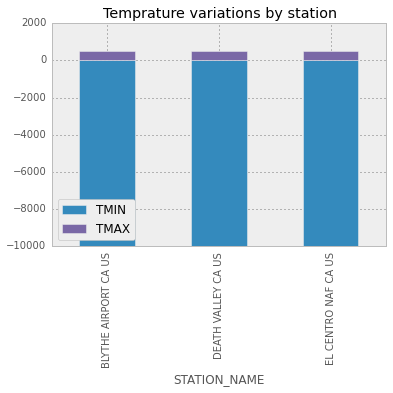

In [152]:
df1.plot(kind='bar', stacked= True, x=df1.STATION_NAME, title='Temprature variations by station')

We plot the information and find that there is a wide range in the minimum tempratue in the three cities, we should porably explore if these are outliers.

In [153]:
df.ix[::2] = np.nan
df.describe(percentiles=[.05, .25, .75, .95])

,MDPR,DAPR,PRCP,TMAX,TMIN,TOBS
count,324603.000000,324603.000000,324603.000000,324603.000000,324603.000000,324603.000000
mean,-9987.802654,-9987.937628,-2627.986858,-4196.863486,-4302.559465,-7994.314609
std,336.641271,332.458684,4414.731354,5068.378252,5003.690138,4039.251616
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
5%,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
50%,-9999.000000,-9999.000000,0.000000,128.000000,6.000000,-9999.000000
75%,-9999.000000,-9999.000000,0.000000,244.000000,106.000000,-9999.000000
95%,-9999.000000,-9999.000000,53.000000,350.000000,183.000000,211.000000
max,2543.000000,30.000000,12344.000000,650.000000,583.000000,461.000000


    # We go ahead and plot the total rainfall in June 2015

In [133]:
pysqldf = lambda q: sqldf(q, globals())

q = """
select 
      station_name,  sum(PRCP) total_rain 
from df
    where station in ('GHCND:USC00042319','GHCND:USW00023158','GHCND:USW00023199' ) and
    date between '2015-06-01' and '2015-07-01'
    group by STATION_NAME
"""
df2 =  sqldf(q, locals())

df2.head()


,STATION_NAME,total_rain
0,BLYTHE AIRPORT CA US,10
1,DEATH VALLEY CA US,0
2,EL CENTRO NAF CA US,0


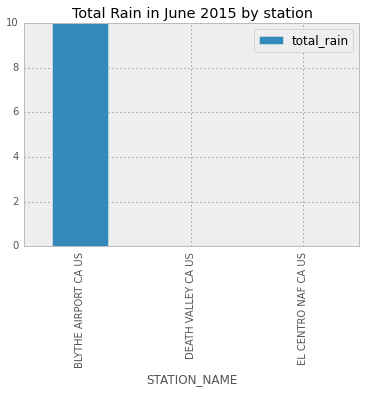

In [136]:
df2.plot(kind='bar', stacked= False, x=df1.STATION_NAME, title='Total Rain in June 2015 by station')